In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import skimage
import skimage.io as sio
import matplotlib.pyplot as plt
from skimage.morphology import square, opening, closing
from skimage.measure import regionprops, label
import diff_register.im_process as imp
%matplotlib inline

c:\users\enuser\anaconda3\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from uint16 to uint8
  .format(dtypeobj_in, dtypeobj_out))


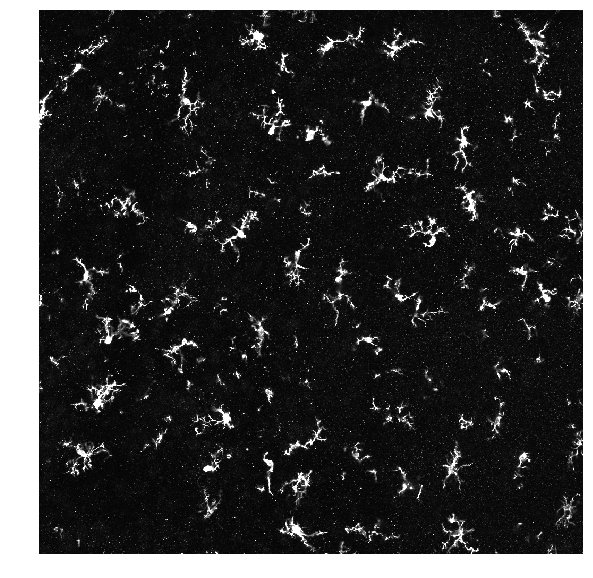

In [2]:
original_im = sio.imread('mglia_small.tif')
original_im = original_im[:, :, 1]
original_im = skimage.img_as_ubyte(original_im)
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(original_im, cmap='gray')
ax.axis('off')
sio.imsave('mglia_small.png', original_im)

In [ ]:
original_im

In [ ]:
# rf_image = imp.fuzzy_contrast('mglia_small.tif')
# rf_image = sio.imread('fuzzy_mglia_small.png')
# fig, ax = plt.subplots(figsize=(10, 10))
# ax.imshow(rf_image, cmap='gray')
# ax.axis('off')

In [3]:
op_image = imp.binary_image('mglia_small.png', threshold=50, close=True)

In [4]:
op_image = skimage.img_as_ubyte(op_image)
sio.imsave('clean_mglia_small.png', op_image)

In [8]:
# fig, ax = plt.subplots(figsize=(10, 10))
# ax.imshow(op_image, cmap='gray')
# ax.axis('off')

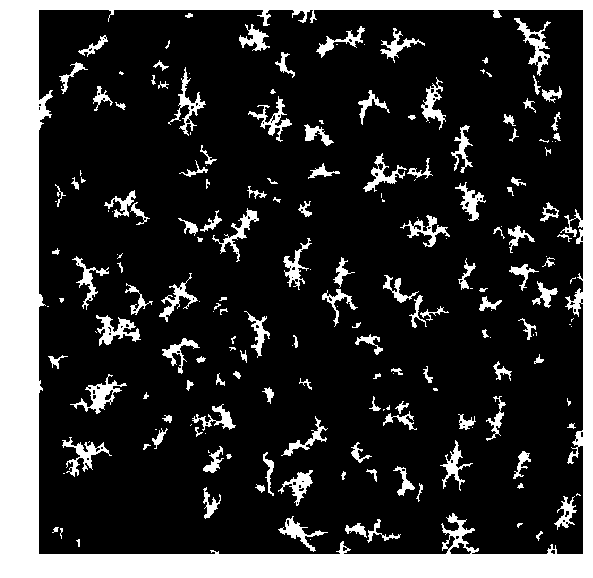

In [7]:
short_image, props = imp.label_image('clean_mglia_small.png', show=True)

In [11]:
counter = 0
areas = []
for mglia in props:
    areas.append(props[mglia].area)

areas

TypeError: list indices must be integers or slices, not _RegionProperties

In [ ]:
soma = closing(short_image, square(6))
soma = opening(soma, square(13))
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(soma, cmap='gray')
ax.axis('off')

In [ ]:
sio.imsave('mglia_soma.png', soma)

In [ ]:
props = regionprops(labels)

In [ ]:
short_image = np.zeros(labels.shape)
counter = 0
skip = 0
short_props = []
for i in range(0, len(props)):
    area = props[i]['area']
    if area < 50:
        skip = skip + 1
    else:
        short_props.append(props[i])
        test_coords = props[i]['coords'].tolist()
        for coord in test_coords:
            short_image[coord[0], coord[1]] = True
        counter = counter + 1

In [ ]:
len(short_props)

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(short_image, cmap='gray')
ax.axis('off')

In [ ]:
short_image[]

In [ ]:
props[0]['coords'].tolist()[0]